<a href="https://colab.research.google.com/github/Priya349958/MLAP_Final/blob/main/Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:purple' align='center'>MLRM</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Priya349958/MLAP5/main/carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

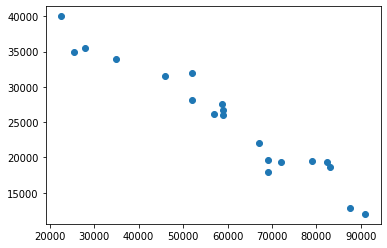

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

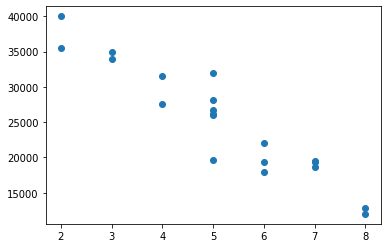

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [6]:
X = df[['Mileage','Age(yrs)']]

In [7]:
y = df['Sell Price($)']

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( df[['Mileage','Age(yrs)']] )
Y = df['Sell Price($)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, 
                                                    random_state = 100) 

In [16]:
X_train

,const,Mileage,Age(yrs)
16,1.0,28000,2
1,1.0,35000,3
9,1.0,67000,6
14,1.0,82450,7
12,1.0,59000,5
5,1.0,59000,5
2,1.0,57000,5
4,1.0,46000,4
10,1.0,83000,7
0,1.0,69000,6


In [17]:
X_test

,const,Mileage,Age(yrs)
17,1.0,69000,5
19,1.0,52000,5
11,1.0,79000,7
18,1.0,87600,8
13,1.0,58780,4
6,1.0,52000,5


In [18]:
y_train

16    35500
1     34000
9     22000
14    19400
12    26000
5     26750
2     26100
4     31500
10    18700
0     18000
15    35000
7     19300
3     40000
8     12000
Name: Sell Price($), dtype: int64

In [19]:
y_test

17    19700
19    28200
11    19500
18    12800
13    27500
6     32000
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [20]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary2()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.950     
Dependent Variable: Sell Price($)    AIC:                252.8974  
Date:               2021-10-16 13:22 BIC:                254.8145  
No. Observations:   14               Log-Likelihood:     -123.45   
Df Model:           2                F-statistic:        123.9     
Df Residuals:       11               Prob (F-statistic): 2.85e-08  
R-squared:          0.958            Scale:              3.3984e+06
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     46724.7736 1422.5909 32.8448 0.0000 43593.6723 49855.8750
Mileage      -0.1485    0.1592 -0.9325 0.3711    -0.4989     0.2020
Age(yrs)  -2487.7785 1887.0268 -1.3184 0.2142 -6641.0964  1665.5394
-------------------------------------------------------------------
Omnibus:              1.228         Durbin-Watson:           1.988 
Prob(Omnibus):        0.541         Jarque-Bera (JB):        0.932 
Skew:                 -0.570        Prob(JB):                0.628 
Kurtosis:             2.454         Condition No.:           240512
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [22]:
clf.predict(X_test)

array([24040.92867566, 26565.04739479, 17580.59595945, 13815.91034317,
       28046.14795811, 26565.04739479])

In [23]:
y_test

17    19700
19    28200
11    19500
18    12800
13    27500
6     32000
Name: Sell Price($), dtype: int64

In [24]:
clf.score(X_test, y_test)

0.7801079595887171

**random_state argument**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,const,Mileage,Age(yrs)
7,1.0,72000,6
10,1.0,83000,7
5,1.0,59000,5
6,1.0,52000,5
3,1.0,22500,2
18,1.0,87600,8


P-P Plot

Later


<Figure size 576x432 with 0 Axes>

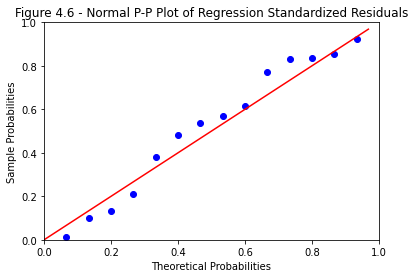

In [26]:
def draw_pp_plot( model, title ):
  probplot = sm.ProbPlot( model.resid );
  plt.figure( figsize = (8, 6) );
  probplot.ppplot( line='45' );
  plt.title( title );
  plt.show();
draw_pp_plot( model_1,
            "Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals"
);

 Residual Plot